In [1]:
from utils import *

In [2]:
percentiles = [0.99, 0.90, 0.75, 0.50, 0.25, 0.10, 0.01]

In [3]:
market_data = load_and_prepare_market_data(
    path_market_data='prices_yf.parquet',
    start_date=init_date,
    volume_smoother=smoother_volumes,
    cost_transaction=0.0,
    cost_shorting=COST_SHORTING,
    cost_market_impact=market_impact_cost('volume_smoothed', 'volatility'),
).collect()
market_data.describe(percentiles=percentiles)

statistic,date,symbol,price,volume,date_index,n_days_listed,cost_shorting,volume_smoothed,cost_transaction,volatility,cost_market_impact
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""11098289""","""11098289""",1.1098242e7,1.1098242e7,1.1098289e7,1.1098289e7,1.1098289e7,1.1081817e7,1.1098289e7,1.1098289e7,1.0880285e7
"""null_count""","""0""","""0""",47.0,47.0,0.0,0.0,0.0,16472.0,0.0,0.0,218004.0
"""mean""","""2015-06-21""",null,4.0150e10,4.1615e7,3890.517479,2214.30132,0.00002,4.1601e7,0.0,0.112915,0.002084
"""std""",null,null,4.6941e12,4.6486e8,1702.257102,1702.263207,0.0,4.4957e8,0.0,1.583115,0.154573
"""min""","""2000-01-03""","""AACG""",0.001,0.0,0.0,1.0,0.00002,0.0,0.0,0.0,9.0483e-9
"""1%""","""2000-07-19""",null,0.54,0.0,137.0,28.0,0.00002,0.0,0.0,0.003109,6.4342e-7
"""10%""","""2004-11-29""",null,2.83,5036.726761,1232.0,272.0,0.00002,11746.144018,0.0,0.015737,0.000004
"""25%""","""2010-05-27""",null,7.0,70826.593018,2615.0,716.0,0.00002,93399.284592,0.0,0.023254,0.00001
"""50%""","""2016-12-29""",null,16.351,776432.460938,4275.0,1829.0,0.00002,881538.239302,0.0,0.03417,0.000033


In [4]:
market_data.select(pl.col([pl.Float32, pl.Float64]).is_nan()).sum()

price,volume,cost_shorting,volume_smoothed,cost_transaction,volatility,cost_market_impact
u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0


In [5]:
market_data.select(pl.col([pl.Float32, pl.Float64]).is_null()).sum()

price,volume,cost_shorting,volume_smoothed,cost_transaction,volatility,cost_market_impact
u32,u32,u32,u32,u32,u32,u32
47,47,0,16472,0,0,218004


# Shorting cost

In [6]:
COST_SHORTING * 1e4

0.1984126984126984

# Transaction cost

## Check formula

In [7]:
def transaction_cost(smoothed_volume):
    params = {
        'log_coef': -0.175437,
        'const_coef': 4.169923,
        'mult_bias': 1.301015,
        'max': 90.0,
        'min': 0.1,
    }
    return (
        (params['const_coef'] + pl.col(smoothed_volume).log() * params['log_coef'])
        .exp()
        .mul(params['mult_bias'])
        .clip(params['min'], params['max'])
        .mul(1e-4)
    )

In [8]:
def transaction_cost_no_clip(smoothed_volume):
    params = {
        'log_coef': -0.175437,
        'const_coef': 4.169923,
        'mult_bias': 1.301015,
        'max': 90.0,
        'min': 0.1,
    }
    return (
        (params['const_coef'] + pl.col(smoothed_volume).log() * params['log_coef'])
        .exp()
        .mul(params['mult_bias'])
    )

<Figure size 900x500 with 0 Axes>

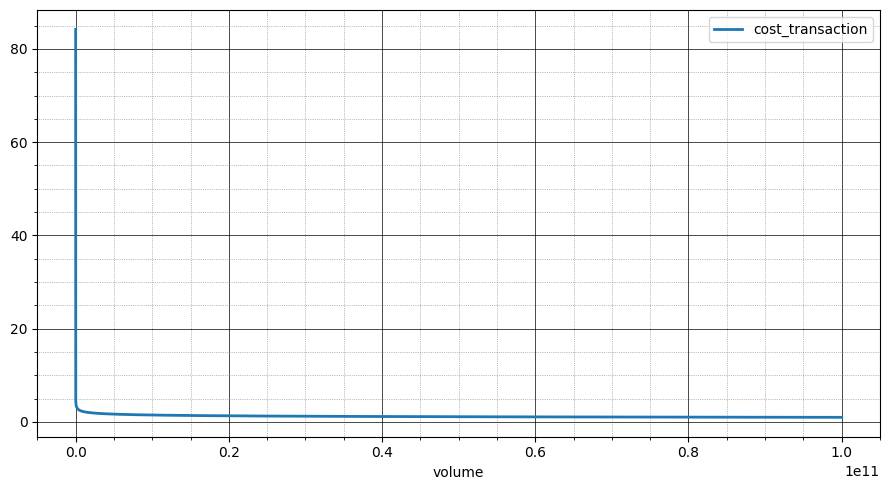

<Figure size 900x500 with 0 Axes>

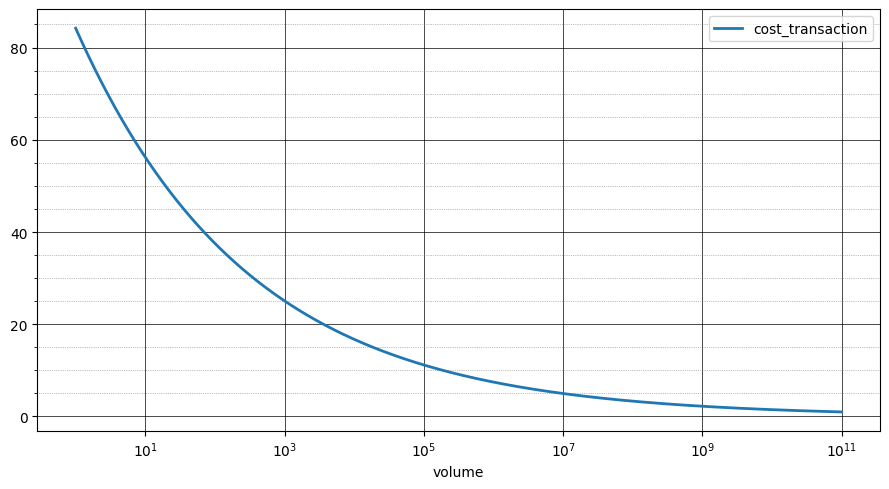

<Figure size 900x500 with 0 Axes>

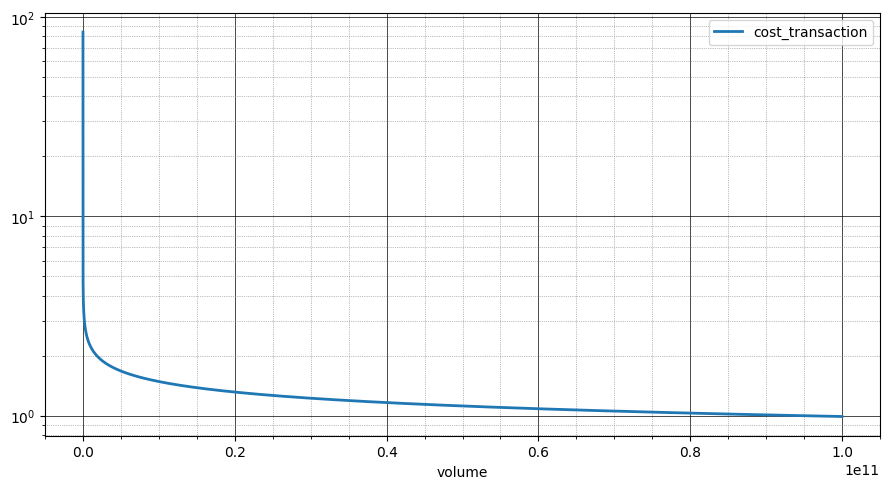

<Figure size 900x500 with 0 Axes>

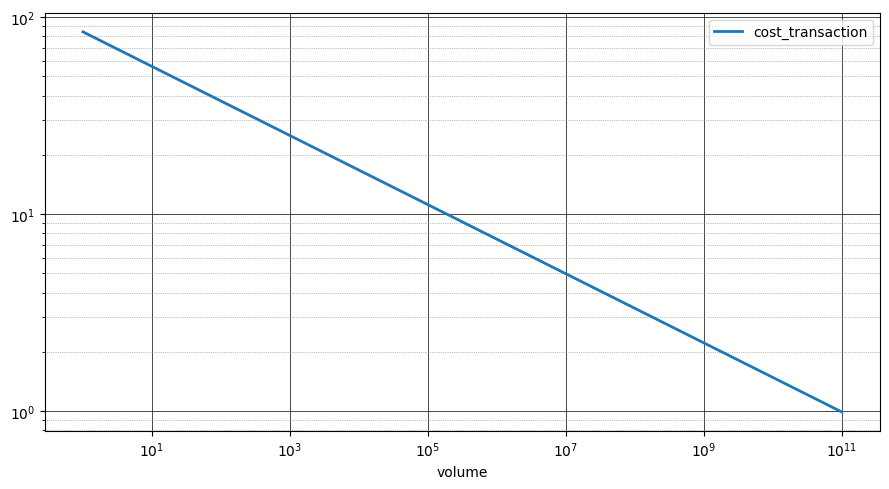

In [9]:
col = 'volume'
data = np.logspace(0, 11, 10000)  # np.linspace(1, 1e11, 10000)
data = (
    pl.DataFrame(data, schema=['volume'])
    .with_columns(cost_transaction=transaction_cost_no_clip('volume'))
)
plot_ts(data, 'volume')
plot_ts(data, 'volume', logx=True)
plot_ts(data, 'volume', logy=True)
plot_ts(data, 'volume', loglog=True)

<Figure size 900x500 with 0 Axes>

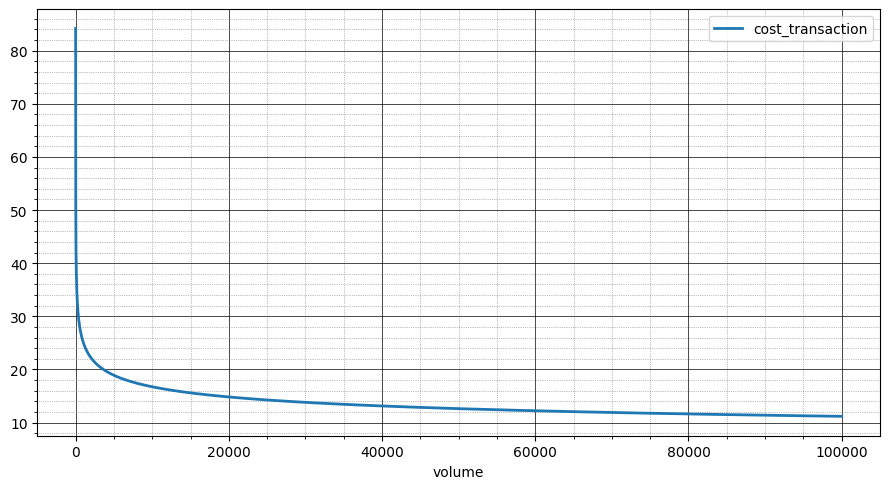

<Figure size 900x500 with 0 Axes>

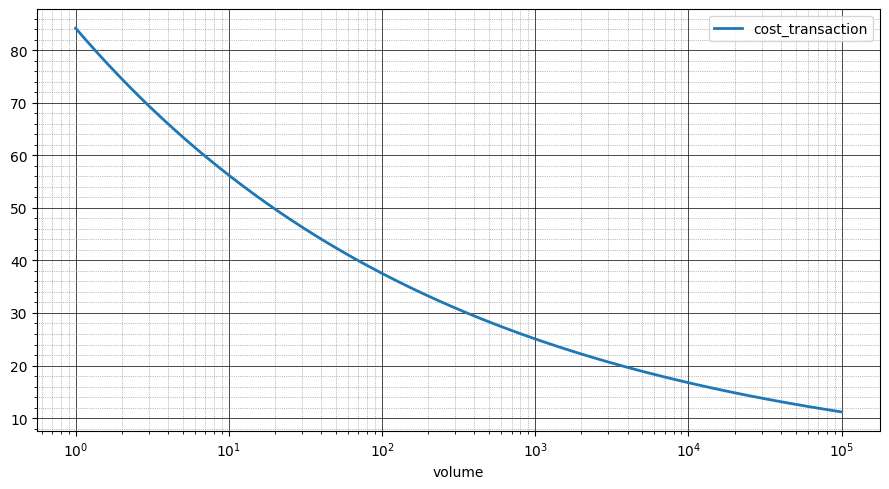

<Figure size 900x500 with 0 Axes>

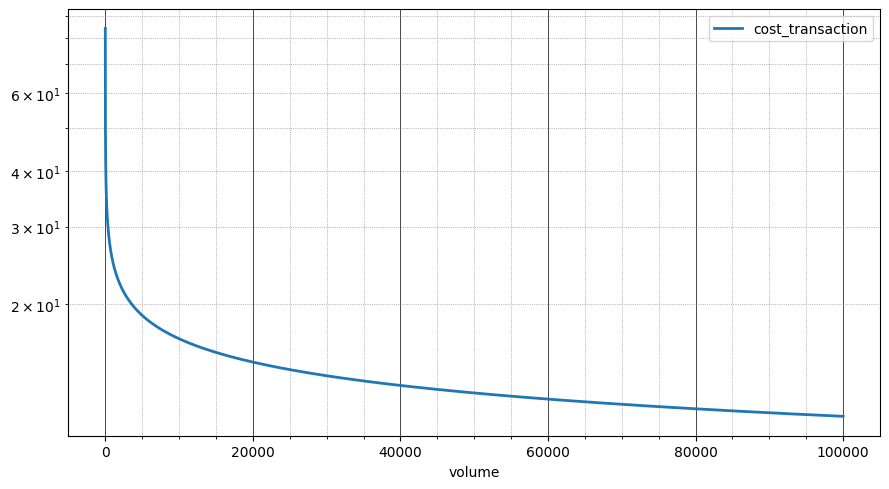

<Figure size 900x500 with 0 Axes>

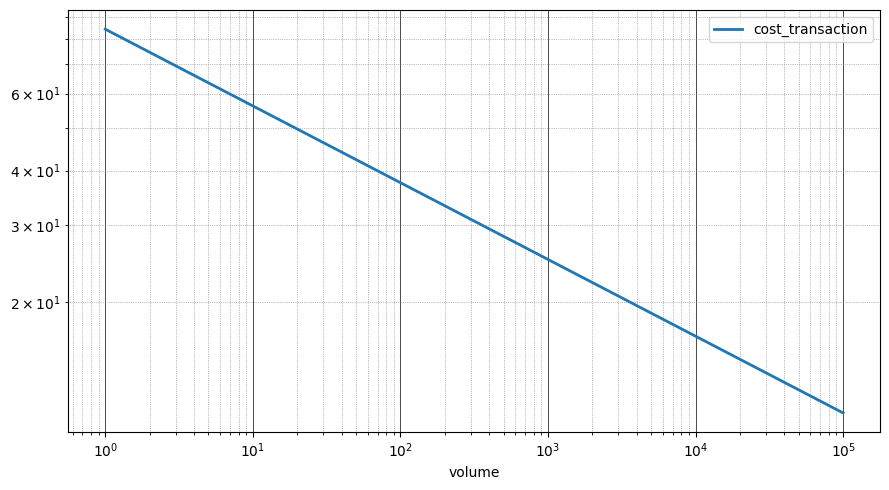

In [10]:
col = 'volume'
data = np.logspace(0, 5, 10000)  # np.linspace(1, 1e10, 10000)
data = (
    pl.DataFrame(data, schema=['volume'])
    .with_columns(cost_transaction=transaction_cost_no_clip('volume'))
)
plot_ts(data, 'volume')
plot_ts(data, 'volume', logx=True)
plot_ts(data, 'volume', logy=True)
plot_ts(data, 'volume', loglog=True)

In [11]:
market_data.select(cost_transaction=transaction_cost_no_clip('volume_smoothed')).describe(percentiles=percentiles)

statistic,cost_transaction
str,f64
"""count""",1.1081817e7
"""null_count""",16472.0
"""mean""",inf
"""std""",NaN
"""min""",1.062781
"""1%""",2.421402
"""10%""",3.842093
"""25%""",5.208585
"""50%""",7.62503


In [12]:
market_data.select(cost_transaction=transaction_cost('volume_smoothed') * 1e4).describe(percentiles=percentiles)

statistic,cost_transaction
str,f64
"""count""",1.1081817e7
"""null_count""",16472.0
"""mean""",10.331137
"""std""",12.095633
"""min""",1.062781
"""1%""",2.421402
"""10%""",3.842093
"""25%""",5.208585
"""50%""",7.62503


## Check on data

array([[<Axes: title={'center': 'volume_smoothed'}>]], dtype=object)

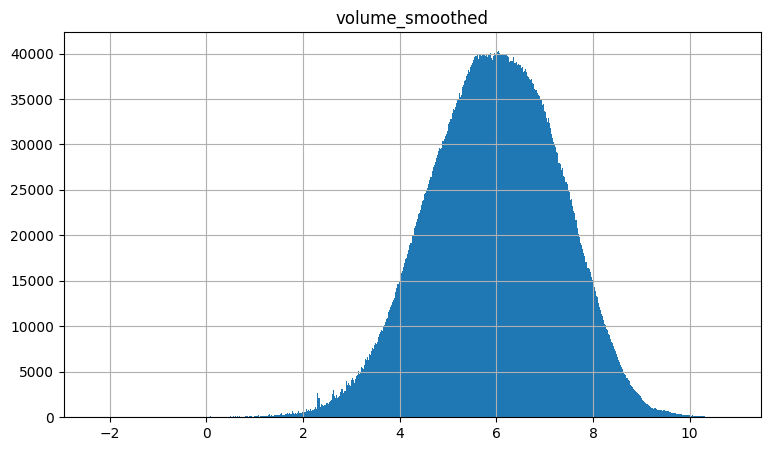

In [13]:
(
    market_data
    .with_columns(pl.col('volume_smoothed').log() / np.log(10))
    .select(not_finite_floats_to_none('volume_smoothed'))
    .to_pandas().hist(bins=1000)
)

array([[<Axes: title={'center': 'cost_transaction'}>]], dtype=object)

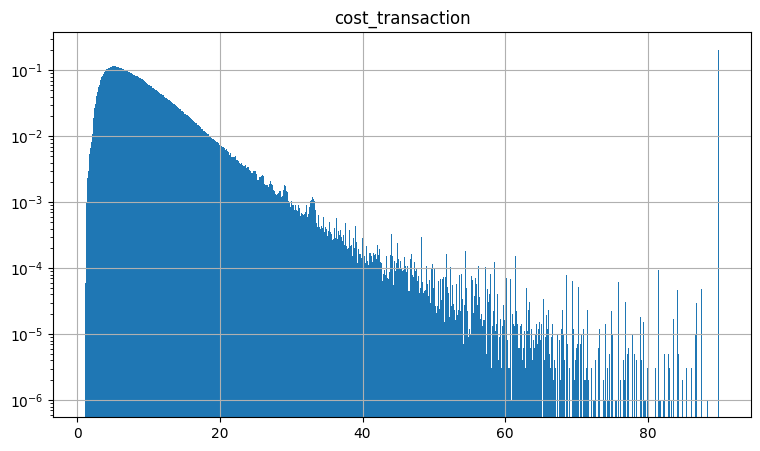

In [14]:
transaction_costs = (
    market_data
    .select(cost_transaction=transaction_cost('volume_smoothed') * 1e4)
)
(
    transaction_costs
    .to_pandas()
    .hist(bins=1000, log=True, density=True)
)

In [15]:
# scatter_plot = (
#     market_data
#     .select([
#         (transaction_cost('volume_smoothed') * 1e4).alias('cost_transaction'),
#         'volume_smoothed',
#     ])
#     .select(pl.all().log())
# )
# scatter_plot.to_pandas().plot.scatter('cost_transaction', 'volume_smoothed')

# Market impact

In [16]:
market_impact_costs = (
    market_data
    .select(cost_market_impact=pl.col('cost_market_impact') * 1e4)
)

array([[<Axes: title={'center': 'cost_market_impact'}>]], dtype=object)

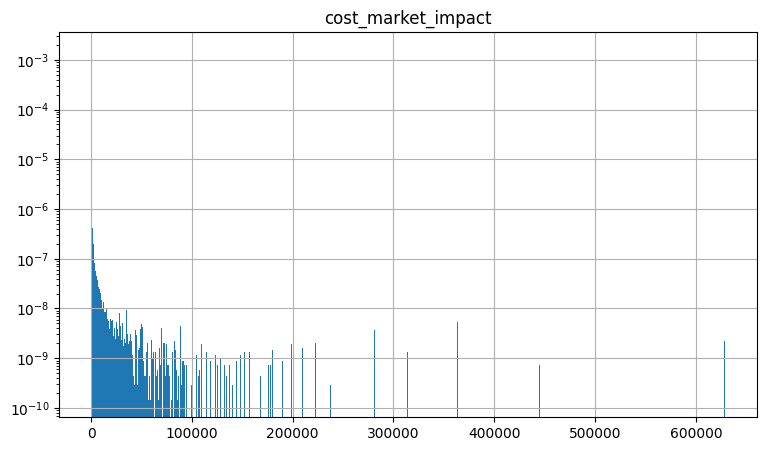

In [17]:
(
    market_impact_costs
    .to_pandas()
    .hist(bins=1000, log=True, density=True)
)

array([[<Axes: title={'center': 'cost_market_impact'}>]], dtype=object)

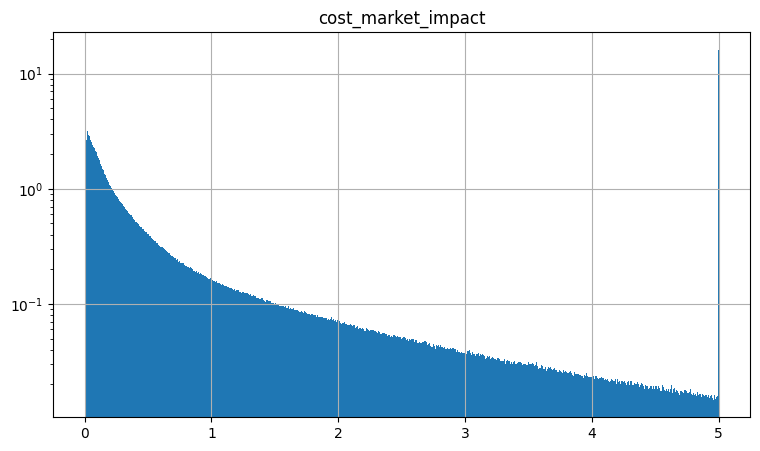

In [18]:
(
    market_impact_costs
    .to_pandas()
    .clip(0, 5)
    .hist(bins=1000, log=True, density=True)
)

In [19]:
market_impact_costs.describe(percentiles=percentiles)

statistic,cost_market_impact
str,f64
"""count""",1.0880285e7
"""null_count""",218004.0
"""mean""",20.837905
"""std""",1545.733464
"""min""",0.00009
"""1%""",0.006434
"""10%""",0.037875
"""25%""",0.101648
"""50%""",0.327841
